# Data Prepatation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [3]:
day_wise = pd.read_csv("/kaggle/input/corona-virus-report/day_wise.csv")

In [4]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [5]:
worldmeter_data = pd.read_csv("/kaggle/input/corona-virus-report/worldometer_data.csv")

In [6]:
worldmeter_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


Out of all these data sets we use worldmeter_data as this consists of all the data that is required and new parameters can be derived

**Trend of the data cases**

In [7]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [8]:
px.line(day_wise,x="Date",y=["Active", "Recovered","Confirmed","Deaths"],title="Trend of covid 19",template="plotly_dark",
       labels= {"value": "Covid Cases"}).show()

**we will try to answer the top 10 countries with maximum Total cases**

**Total Covid cases**

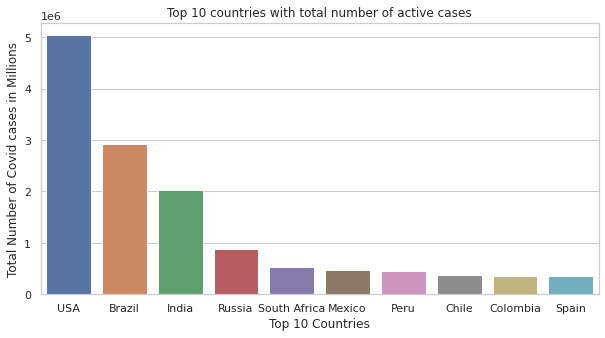

In [9]:
#### We can get this data from worldmeter_data, which has Country/region. total population, toal cases, Total deaths, Active cases
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(data = worldmeter_data.sort_values(by = "TotalCases", ascending = False).head(10), x = "Country/Region", y = "TotalCases")\
    .set(xlabel='Top 10 Countries', ylabel='Total Number of Covid cases in Millions', title = "Top 10 countries with total number of active cases");


**Total Deaths**

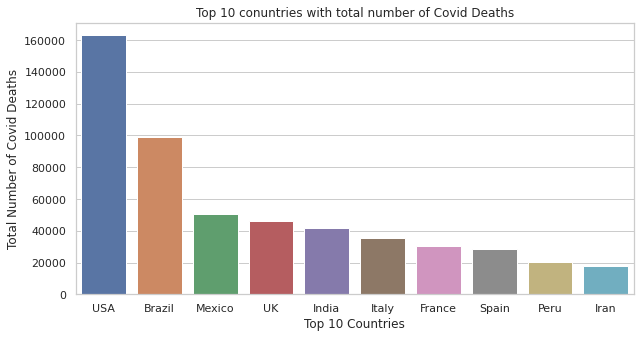

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(data = worldmeter_data.sort_values(by= "TotalDeaths", ascending = False).head(10), x = "Country/Region", y = "TotalDeaths")\
    .set(xlabel='Top 10 Countries', ylabel='Total Number of Covid Deaths', title = "Top 10 conuntries with total number of Covid Deaths");

**Total Active Cases**

In [11]:
Total_active_cases = px.bar(worldmeter_data.sort_values(by= "ActiveCases", ascending = False).head(10), x = "Country/Region", y = "ActiveCases", template="seaborn",title="Top 10 countries with Total Number of Covid Active Cases",
                           width=800, height=300)
Total_active_cases.show()

In [12]:
# can we say the USA, Brazil, India, Russia are more effected contries by lokking at Total number of cases?
# No we are not lokking the percapita deta hence we cannot make make any colclusions about it
# Plotting the grapth to understand the senario, considering Tot Cases/1M pop, Deaths/1M pop
worldmeter_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

**Total cases/1M population**

In [13]:
px.bar(worldmeter_data.sort_values(by= "Tot Cases/1M pop", ascending = False).head(10), x = "Country/Region", y = "Tot Cases/1M pop", template="plotly",title="<b>Top 10 countries with Total Number of Cases/1M population<b>",
      labels={"Tot Cases/1M pop": "Cases/1M Population"}, height=400, width=800).show()

Even though the total number of cases in USA is very high, Qatar has more number of total covid cases when normalize the cases one total population

**Deaths/1M pop**

In [14]:
px.bar(worldmeter_data.sort_values(by= "Tests/1M pop", ascending = False).head(10), x = "Country/Region", y = "Tests/1M pop", template="presentation",title="<b>Top 10 countries with maximum deaths/1Million </b>").show()

Even tough we have more number of covid cases in countries like USA, Brazil, India. Recovery was good, covid spread/Milliion is less and less number of deaths/Million are recorded

We can also represent the data with treemap

In [15]:
px.treemap(worldmeter_data.head(10),values="TotalCases",path=['Country/Region'],template="presentation", title = "Top 10 countries with maximum number of Covid cases").show()

We can visualize the percentage of cases across all the countries with the above tree map

**Top 10 countries with Total Confirmed Cases, Total Recovered Cases, Total Deaths,Total Active Cases**

In [16]:
fig=px.bar(worldmeter_data.head(10),y='Country/Region',x='TotalCases',color='TotalCases',text="TotalCases")
fig.update_layout(template="plotly_dark",title_text="Top 10 countries with Total confirmed cases", height = 350, width = 800)
fig.show()

In [17]:
px.bar(worldmeter_data.sort_values(by="TotalCases", ascending=False).head(10),x='Country/Region',y=['Serious,Critical','TotalDeaths','TotalRecovered','ActiveCases','TotalCases'],template="simple_white", title="Top 10 countries covid spread report",
      labels={"value": "Covid Cases"})\
    .show()


At one Glance data visualization is possbile with stacked bar graphs

Finding the percentage of tests covered for each country

We can get the percentage by total tests / population

In [18]:
worldmeter_data["PercentageofTotalTests"] = (worldmeter_data['TotalTests']/worldmeter_data['Population'])*100

In [19]:
worldmeter_data['PercentageofTotalTests'].idxmax()

91

In [20]:
worldmeter_data.iloc[worldmeter_data['PercentageofTotalTests'].idxmax(), :]

Country/Region            Luxembourg
Continent                     Europe
Population                  626952.0
TotalCases                      7073
NewCases                         NaN
TotalDeaths                    119.0
NewDeaths                        NaN
TotalRecovered                5750.0
NewRecovered                     NaN
ActiveCases                   1204.0
Serious,Critical                 9.0
Tot Cases/1M pop             11282.0
Deaths/1M pop                  190.0
TotalTests                  623994.0
Tests/1M pop                995282.0
WHO Region                    Europe
PercentageofTotalTests     99.528194
Name: 91, dtype: object

Luxembourg is the country where almost everyone went through covid 19 test

Now we plot the grapth for percentage of total tests conducted 

In [21]:
fig=px.bar(worldmeter_data.sort_values(by = 'PercentageofTotalTests', ascending=False).head(10) ,color='PercentageofTotalTests',y="Country/Region",x='PercentageofTotalTests',template="plotly_dark",title="Top 10 Countries with higest percentage of tests")
fig.show()

In [22]:
px.bar(worldmeter_data.sort_values(by = 'PercentageofTotalTests', ascending=False),color='PercentageofTotalTests',y="Country/Region",x='PercentageofTotalTests',template="plotly_dark",title="Percentage of covid tests done tests with respect to total Population", width=1500, height=1000).show()


if percentage of total tests are very less there should be chance that more number of total cases, active cases in a conutry

**Understanding the data with ratios**

**Critical/Serious covid case to deaths**

In [23]:
worldmeter_data["Critical_to_death_Percentage"] = worldmeter_data['Serious,Critical']/worldmeter_data['TotalDeaths']

In [24]:
worldmeter_data["Critical_to_death_Percentage"].max()

1.6

In [25]:
worldmeter_data["Critical_to_death_Percentage"]

0      0.112381
1      0.084323
2      0.214804
3      0.157470
4      0.056122
         ...   
204         NaN
205         NaN
206         NaN
207         NaN
208         NaN
Name: Critical_to_death_Percentage, Length: 209, dtype: float64

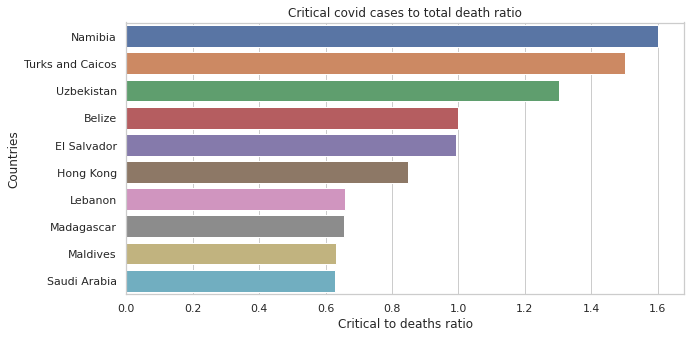

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (10, 5))
sns.barplot(data = worldmeter_data.sort_values(by = "Critical_to_death_Percentage", ascending=False).head(10),orient = 'h', x = "Critical_to_death_Percentage", y = 'Country/Region')\
    .set(title = "Critical covid cases to total death ratio")
plt.xlabel("Critical to deaths ratio")
plt.ylabel("Countries")
plt.show()

In most instances critical cases are converted into deaths for the countries Namibia, Turk, uzbekisthan compared to others`

**Deaths to recovered ratio**

In [27]:
worldmeter_data['Deaths_to_recovered_ratio'] = worldmeter_data['TotalDeaths']/worldmeter_data['TotalRecovered']

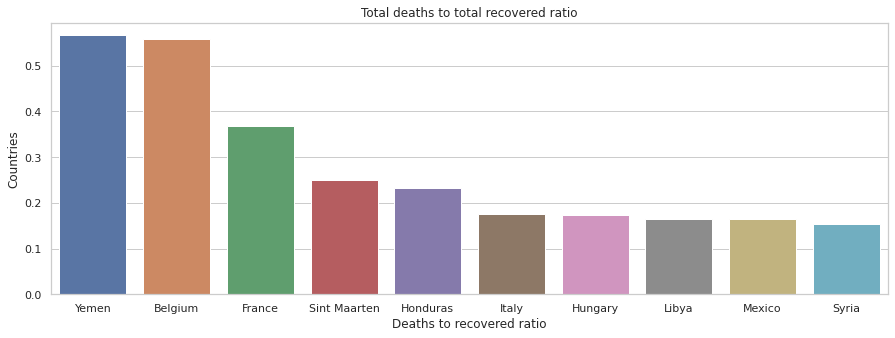

In [28]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (15, 5))
sns.barplot(data = worldmeter_data.sort_values(by = "Deaths_to_recovered_ratio", ascending=False).head(10),orient = 'v', y = "Deaths_to_recovered_ratio", x = 'Country/Region')\
    .set(title = "Total deaths to total recovered ratio")
plt.xlabel("Deaths to recovered ratio")
plt.ylabel("Countries")
plt.show()

More than 50% of chance that the perople from  Yemen Belgium can dead when compared with the recovered cases

**Tests to confirmed ratio**

In [29]:
worldmeter_data['Tests_to_confirmed_ratio'] = worldmeter_data['TotalTests']/worldmeter_data['TotalCases']

In [30]:
(worldmeter_data['TotalTests']/worldmeter_data['TotalCases']).max()

1468.7

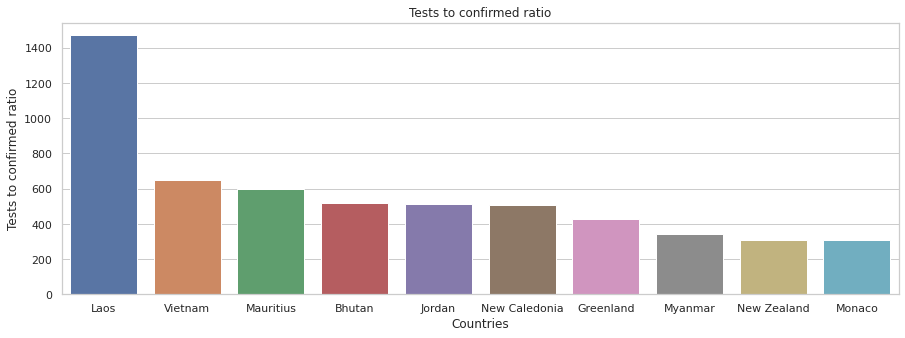

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (15, 5))
sns.barplot(data = worldmeter_data.sort_values(by = "Tests_to_confirmed_ratio", ascending=False).head(10),orient = 'v', y = "Tests_to_confirmed_ratio", x = 'Country/Region')\
    .set(title = "Tests to confirmed ratio")
plt.ylabel("Tests to confirmed ratio")
plt.xlabel("Countries")
plt.show()

In [32]:
worldmeter_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'PercentageofTotalTests',
       'Critical_to_death_Percentage', 'Deaths_to_recovered_ratio',
       'Tests_to_confirmed_ratio'],
      dtype='object')

In [33]:
px.choropleth(data_frame=worldmeter_data, locations='Country/Region', locationmode="country names", color="TotalCases", template="presentation", hover_data=["ActiveCases", "TotalCases", "TotalDeaths", "Serious,Critical", "TotalRecovered", "PercentageofTotalTests"],
              color_continuous_scale = px.colors.sequential.matter,
              title='Covid 19 Spread across all the countries').show()

We can get data for each country as follows

In [34]:
worldmeter_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,PercentageofTotalTests,Critical_to_death_Percentage,Deaths_to_recovered_ratio,Tests_to_confirmed_ratio
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,19.063998,0.112381,0.063184,12.547170
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,6.208521,0.084323,0.048174,4.526446
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,1.603463,0.214804,0.030230,10.935742
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,20.362285,0.157470,0.021595,34.083165
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,5.304352,0.056122,0.024796,5.852658


In [35]:
def country_wisegeoMap(world_data, country):
    for c in country:
        df = world_data[world_data['Country/Region'] == c]
        f = px.choropleth(data_frame=df, locations='Country/Region', locationmode="country names", template="presentation", hover_data=["ActiveCases", "TotalCases", "TotalDeaths", "Serious,Critical", "TotalRecovered", "PercentageofTotalTests"],
              color_continuous_scale = px.colors.sequential.matter,
              title=f'Covid 19 Spread in {c}')
        f.show()
        
    

In [36]:
worldmeter_data['Country/Region'].unique().tolist()

['USA',
 'Brazil',
 'India',
 'Russia',
 'South Africa',
 'Mexico',
 'Peru',
 'Chile',
 'Colombia',
 'Spain',
 'Iran',
 'UK',
 'Saudi Arabia',
 'Pakistan',
 'Bangladesh',
 'Italy',
 'Turkey',
 'Argentina',
 'Germany',
 'France',
 'Iraq',
 'Philippines',
 'Indonesia',
 'Canada',
 'Qatar',
 'Kazakhstan',
 'Egypt',
 'Ecuador',
 'Bolivia',
 'Sweden',
 'Oman',
 'Israel',
 'Ukraine',
 'Dominican Republic',
 'Panama',
 'Belgium',
 'Kuwait',
 'Belarus',
 'UAE',
 'Romania',
 'Netherlands',
 'Singapore',
 'Guatemala',
 'Portugal',
 'Poland',
 'Nigeria',
 'Honduras',
 'Bahrain',
 'Japan',
 'Armenia',
 'Ghana',
 'Kyrgyzstan',
 'Afghanistan',
 'Switzerland',
 'Algeria',
 'Azerbaijan',
 'Morocco',
 'Uzbekistan',
 'Serbia',
 'Moldova',
 'Ireland',
 'Kenya',
 'Venezuela',
 'Nepal',
 'Austria',
 'Costa Rica',
 'Ethiopia',
 'Australia',
 'El Salvador',
 'Czechia',
 'Cameroon',
 'Ivory Coast',
 'S. Korea',
 'Denmark',
 'Palestine',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Madagascar',
 'Sudan',
 'North 

In [37]:
country_wisegeoMap(worldmeter_data, ['India', "USA"])

If we need the data for each date, we can get it as follows

In [38]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [39]:
fully_grouped_data = pd.read_csv("/kaggle/input/corona-virus-report/full_grouped.csv")

In [40]:
fully_grouped_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [41]:

def country_visualization(fully_grouped_data,country):
    
    grouped_df=fully_grouped_data[fully_grouped_data['Country/Region']==country]
    grouped_df=grouped_df.loc[:,['Date',"Active", 'Recovered',"Confirmed", 'Deaths']]
    plot = make_subplots(rows=1, cols=4,subplot_titles=("Active_Cases", 'Recovered_cases',"Confirmed_cases", 'Deaths'))
    plot.add_trace(
        go.Bar(name="Active",x=grouped_df['Date'],y=grouped_df['Active']),
        row=1, col=1
    )

    plot.add_trace(
        go.Bar(name="Recovered",x=grouped_df['Date'],y=grouped_df['Recovered']),
        row=1, col=2
    )
    plot.add_trace(
        go.Bar(name="Confirmed",x=grouped_df['Date'],y=grouped_df['Confirmed']),
        row=1, col=3
    )

    plot.add_trace(
        go.Bar(name="Deaths",x=grouped_df['Date'],y=grouped_df['Deaths']),
        row=1, col=4
    )

    plot.update_layout(title_text=f"Covid Spread in {country}",template="presentation")
    plot.show()

In [42]:
country_visualization(fully_grouped_data,'India')

In [43]:
country_visualization(fully_grouped_data,'China')